In [1]:
from pyqubo import Array, Placeholder, Constraint
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def plot_city(cities, sol=None):
    n_city = len(cities)
    cities_dict = dict(cities)
    G = nx.Graph()
    for city in cities_dict:
        G.add_node(city)
        
    # draw path
    if sol:
        city_order = []
        for i in range(n_city):
            for j in range(n_city):
                if sol.array('c', (i, j)) == 1:
                    city_order.append(j)
        for i in range(n_city):
            city_index1 = city_order[i]
            city_index2 = city_order[(i+1) % n_city]
            G.add_edge(cities[city_index1][0], cities[city_index2][0])

    plt.figure(figsize=(3,3))
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, cities_dict)
    plt.axis("off")
    plt.show()

def dist(i, j, cities):
    pos_i = cities[i][1]
    pos_j = cities[j][1]
    return np.sqrt((pos_i[0] - pos_j[0])**2 + (pos_i[1] - pos_j[1])**2)

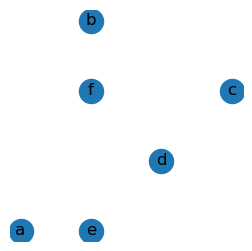

In [68]:
cities = [
    ("a", (0, 0)),
    ("b", (1, 3)),
    ("c", (3, 2)),
    ("d", (2, 1)),
    ("e", (1, 0)),
    ("f", (1, 2))
]
plot_city(cities)

In [77]:
n_city = len(cities)
x = Array.create('c', (n_city, n_city), 'BINARY')

In [79]:
x

Array([[Binary(c[0][0]), Binary(c[0][1]), Binary(c[0][2]), Binary(c[0][3]), Binary(c[0][4]), Binary(c[0][5])],
       [Binary(c[1][0]), Binary(c[1][1]), Binary(c[1][2]), Binary(c[1][3]), Binary(c[1][4]), Binary(c[1][5])],
       [Binary(c[2][0]), Binary(c[2][1]), Binary(c[2][2]), Binary(c[2][3]), Binary(c[2][4]), Binary(c[2][5])],
       [Binary(c[3][0]), Binary(c[3][1]), Binary(c[3][2]), Binary(c[3][3]), Binary(c[3][4]), Binary(c[3][5])],
       [Binary(c[4][0]), Binary(c[4][1]), Binary(c[4][2]), Binary(c[4][3]), Binary(c[4][4]), Binary(c[4][5])],
       [Binary(c[5][0]), Binary(c[5][1]), Binary(c[5][2]), Binary(c[5][3]), Binary(c[5][4]), Binary(c[5][5])]])

In [70]:
# Constraint not to visit more than two cities at the same time.
time_const = 0.0
for i in range(n_city):
    # If you wrap the hamiltonian by Const(...), this part is recognized as constraint
    time_const += Constraint((sum(x[i, j] for j in range(n_city)) - 1)**2, label="time{}".format(i))

# Constraint not to visit the same city more than twice.
city_const = 0.0
for j in range(n_city):
    city_const += Constraint((sum(x[i, j] for i in range(n_city)) - 1)**2, label="city{}".format(j))

In [71]:
# distance of route
distance = 0.0
for i in range(n_city):
    for j in range(n_city):
        for k in range(n_city):
            d_ij = dist(i, j, cities)
            distance += d_ij * x[k, i] * x[(k+1)%n_city, j]

In [72]:

# Construct hamiltonian
A = Placeholder("A")
H = distance + A * (time_const + city_const)

In [80]:

# Compile model
model = H.compile()
# Generate QUBO
#Changing this changes the A in the place holder and therefore the affect that the time_const and city const have
feed_dict = {'A': 4.0}
bqm = model.to_bqm(feed_dict=feed_dict)

In [74]:
import neal
sa = neal.SimulatedAnnealingSampler()
sampleset = sa.sample(bqm, num_reads=100, num_sweeps=100)

# Decode solution
decoded_samples = model.decode_sampleset(sampleset, feed_dict=feed_dict)
best_sample = min(decoded_samples, key=lambda x: x.energy)
num_broken = len(best_sample.constraints(only_broken=True))
print("number of broken constarint = {}".format(num_broken))

number of broken constarint = 0


In [85]:
best_sample

DecodedSample(decoded_subhs=[Constraint(city5,energy=0.000000),Constraint(city4,energy=0.000000),Constraint(city3,energy=0.000000),Constraint(city2,energy=0.000000),Constraint(city0,energy=0.000000),Constraint(city1,energy=0.000000),Constraint(time5,energy=0.000000),Constraint(time4,energy=0.000000),Constraint(time3,energy=0.000000),Constraint(time2,energy=0.000000),Constraint(time0,energy=0.000000),Constraint(time1,energy=0.000000)],sample={c[2][0]:0,c[4][1]:0,c[0][5]:1,c[0][0]:0,c[5][1]:1,c[1][5]:0,c[2][4]:1,c[1][4]:0,c[3][4]:0,c[1][0]:1,c[0][2]:0,c[1][1]:0,c[1][2]:0,c[0][4]:0,c[0][3]:0,c[2][3]:0,c[1][3]:0,c[0][1]:0,c[4][0]:0,c[3][0]:0,c[2][1]:0,c[5][2]:0,c[5][3]:0,c[2][5]:0,c[4][3]:0,c[3][1]:0,c[2][2]:0,c[3][2]:0,c[5][0]:0,c[3][3]:1,c[3][5]:0,c[4][2]:1,c[4][4]:0,c[4][5]:0,c[5][4]:0,c[5][5]:0})

In [75]:
num_broken

0

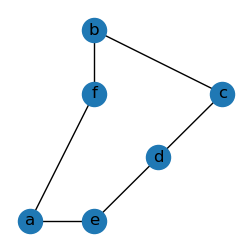

In [76]:
if num_broken == 0:
    plot_city(cities, best_sample)

In [35]:
from dimod import BinaryQuadraticModel
from dwave.system import LeapHybridSampler

In [ ]:
# sampler = LeapHybridSampler()

# sampleset = sampler.sample(bqm, label='Example Travelling Sales Person')
# sample = sampleset.first.sample

Error: Session cannot generate requests

In [ ]:
sample

Error: Session cannot generate requests

In [ ]:
decoded_Best_samples = model.decode_sampleset(sample, feed_dict=feed_dict)

Error: Session cannot generate requests